Жданова Яна ИУ5-64Б

# Лабораторная работа 2
# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
# Задание
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)

Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
* обработку пропусков в данных;
* кодирование категориальных признаков;
* масштабирование данных.


## Импорт библиотек и данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding = 'ISO-8859-1')

In [ ]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
df.shape

(995, 28)

# Обработка пропущенных данных

In [ ]:
# проверим есть ли пропущенные значения
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [ ]:
df = df.copy()
df.columns = df.columns.str.replace('_', ' ').str.title()
df.columns.tolist()

['Rank',
 'Youtuber',
 'Subscribers',
 'Video Views',
 'Category',
 'Title',
 'Uploads',
 'Country',
 'Abbreviation',
 'Channel Type',
 'Video Views Rank',
 'Country Rank',
 'Channel Type Rank',
 'Video Views For The Last 30 Days',
 'Lowest Monthly Earnings',
 'Highest Monthly Earnings',
 'Lowest Yearly Earnings',
 'Highest Yearly Earnings',
 'Subscribers For Last 30 Days',
 'Created Year',
 'Created Month',
 'Created Date',
 'Gross Tertiary Education Enrollment (%)',
 'Population',
 'Unemployment Rate',
 'Urban Population',
 'Latitude',
 'Longitude']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   Subscribers                              995 non-null    int64  
 2   Video Views                              995 non-null    float64
 3   Category                                 995 non-null    object 
 4   Title                                    995 non-null    object 
 5   Uploads                                  995 non-null    int64  
 6   Country                                  995 non-null    object 
 7   Abbreviation                             995 non-null    object 
 8   Channel Type                             995 non-null    object 
 9   Video Views Rank                         995 non-null    float64
 10  Country Rank                             995 non-n

In [ ]:
df = df.drop(columns = 'Rank')
df.columns.tolist()

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Youtuber, Subscribers, Video Views, Category, Title, Uploads, Country, Abbreviation, Channel Type, Video Views Rank, Country Rank, Channel Type Rank, Video Views For The Last 30 Days, Lowest Monthly Earnings, Highest Monthly Earnings, Lowest Yearly Earnings, Highest Yearly Earnings, Subscribers For Last 30 Days, Created Year, Created Month, Created Date, Gross Tertiary Education Enrollment (%), Population, Unemployment Rate, Urban Population, Latitude, Longitude]
Index: []

[0 rows x 27 columns]


In [ ]:
categorical_columns = df.select_dtypes(include = ['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Unknown')
numerical_columns = df.select_dtypes(include = ['float', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(0)

In [ ]:
# проверим есть ли пропущенные значения
df.isnull().sum()

Youtuber                                   0
Subscribers                                0
Video Views                                0
Category                                   0
Title                                      0
Uploads                                    0
Country                                    0
Abbreviation                               0
Channel Type                               0
Video Views Rank                           0
Country Rank                               0
Channel Type Rank                          0
Video Views For The Last 30 Days           0
Lowest Monthly Earnings                    0
Highest Monthly Earnings                   0
Lowest Yearly Earnings                     0
Highest Yearly Earnings                    0
Subscribers For Last 30 Days               0
Created Year                               0
Created Month                              0
Created Date                               0
Gross Tertiary Education Enrollment (%)    0
Population

# Кодирование категориальных признаков

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Category'].unique()

array(['Music', 'Film & Animation', 'Entertainment', 'Education', 'Shows',
       'Unknown', 'People & Blogs', 'Gaming', 'Sports', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [ ]:
le = LabelEncoder()
cat_le = le.fit_transform(df['Category'])
le.classes_

array(['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film & Animation', 'Gaming', 'Howto & Style', 'Movies', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Shows', 'Sports',
       'Trailers', 'Travel & Events', 'Unknown'], dtype=object)

In [ ]:
np.unique(cat_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [ ]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

array(['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film & Animation', 'Gaming', 'Howto & Style', 'Movies', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Shows', 'Sports',
       'Trailers', 'Travel & Events', 'Unknown'], dtype=object)

# Масштабирование

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['Subscribers']])

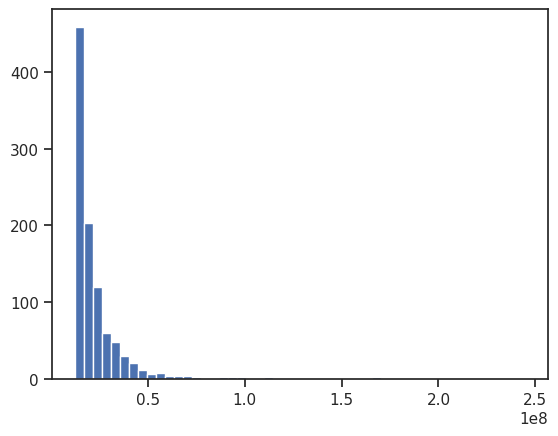

In [ ]:
plt.hist(df['Subscribers'], 50)
plt.show()

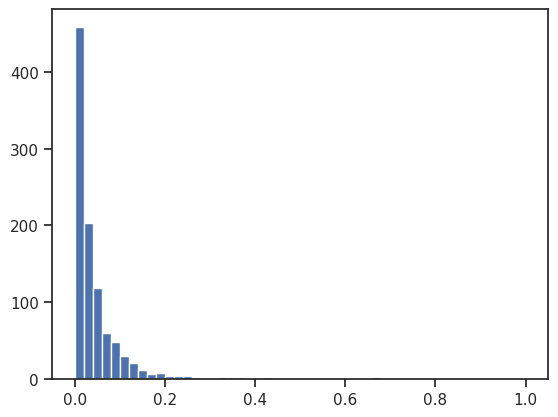

In [ ]:
plt.hist(sc1_data, 50)
plt.show()